导入所需要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import seaborn as sns
import re

读取数据

In [2]:
# 使用Pandas的read_csv()函数读取数据
dataset = pd.read_csv("./input/LoanStats_securev1_2019Q3.csv", encoding="gbk", low_memory=False)
# 查看前五行数据
dataset.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,158303403,NaN,12000,12000,12000,36 months,8.19%,377.09,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,158628181,NaN,20000,20000,20000,36 months,8.81%,634.23,A,A5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,159231951,NaN,18000,18000,18000,60 months,13.08%,410.30,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,159289397,NaN,10000,10000,10000,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,159296485,NaN,7000,7000,7000,36 months,18.62%,255.25,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 查看数据集中行与列数量。
dataset.shape

(143035, 150)

In [4]:
# 查看前10行缺失值数据
dataset.isnull().head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True


In [5]:
# 创建一个新的DataFrame数据表来存储每列数据中缺失值所占的百分比
# 此数据表只有两列，一列为原来的属性名，另一列为缺失值所占百分比，命名为NA_Ratio
na_ratio = pd.DataFrame(dataset.isnull().sum() / len(dataset) * 100, columns=['NA_Ratio'])
# 可以使用head()函数查看na_ratio格式
na_ratio.head(10)

,NA_Ratio
id,0.0
member_id,100.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0
term,0.0
int_rate,0.0
installment,0.0
grade,0.0
sub_grade,0.0


In [6]:
# 在 index 中使用条件语句进行筛选
# 使用 sort_values 进行排序 - by=列名,ascending=升序or降序
df_na = na_ratio[na_ratio['NA_Ratio'] >= 90].sort_values(by='NA_Ratio', ascending=False)
df_na.iloc[20:30]

,NA_Ratio
hardship_type,100.000000
settlement_term,100.000000
sec_app_mths_since_last_major_derog,95.762576


In [7]:
# 将中间结果保存为csv文件，存到output文件夹
# 文件不需要提前创建，由pandas自动生成，若已存在该文件，则已存在文件会被覆盖
df_na.to_csv("./output/df_na.csv", index=False, )

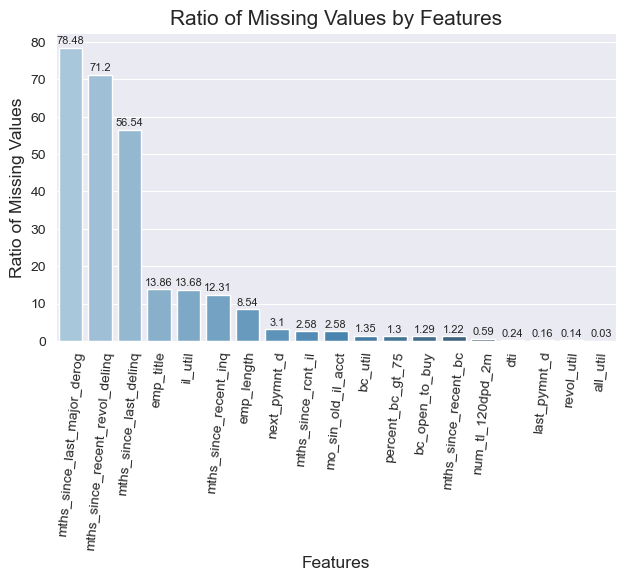

In [8]:
# 设置 dataframe - 下标筛选 0.01~80% 之间的数据 & 排序
df_na = na_ratio[(na_ratio['NA_Ratio'] < 80) & (na_ratio['NA_Ratio'] >= 0.01)].sort_values(by='NA_Ratio',
                                                                                           ascending=False)
# 绘图，使用subplots函数创建图像，
# 其中 figsize 用来设置图形的大小，20为图形的宽， 10为图形的高，单位为英寸。
# 返回 figure 和 ax
fontsize_factor = 0.5  # 对字体和图表进行缩放
fig, ax = plt.subplots(figsize=(20 * fontsize_factor * 0.8, 10 * fontsize_factor * 0.8))
# barplot指定图形为条形图，绑定x轴和y轴的数据
# orient='v'表示竖直展示即数值条方向；palette：调色板，控制不同的颜色风格
nar = sns.barplot(x=df_na.index, y=df_na['NA_Ratio'], orient='v', palette="Blues_d")
# set_xticklabels 设置 x轴标签 的旋转角度
plt.subplots_adjust(left=0.2)  # 向右移动，显示完全标签
ax.set_xticklabels(df_na.index, rotation=85, fontsize=20 * fontsize_factor)
# 设置y轴的 坐标轴名称
ax.set_ylabel('Ratio of Missing Values', fontsize=25 * fontsize_factor)
# 设置x轴的 坐标轴名称
ax.set_xlabel('Features', fontsize=25 * fontsize_factor)
# 设置整个 图的名称
ax.set_title('Ratio of Missing Values by Features', fontsize=30 * fontsize_factor)
# 设置每个数据条上的小数表示
# ax.patches 数据条对象；
# get_x()方法获取其左侧的x坐标
# ax.text()方法用于在数据条上方添加文本标签
# round(value, 2)将缺失值比例保留两位小数
# ha='center'和va='bottom'分别表示文本标签的水平居中和垂直底部对齐
for loc, value in zip(ax.patches, df_na.NA_Ratio):
    ax.text(loc.get_x() + loc.get_width() / 2, loc.get_height() + 0.5, round(value, 2), ha='center', va='bottom',
            fontsize=16 * fontsize_factor)
# 显示图像
plt.show()

In [9]:
dataset_dropna = dataset.copy()
dataset_dropna.dropna()
dataset_dropna.to_csv("./output/test1.csv", index=False)

In [10]:
null_index = list(na_ratio[na_ratio['NA_Ratio'] >= 56].index)
print("需要删除的缺失值较多的列为:", null_index)

需要删除的缺失值较多的列为: ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'sett

In [11]:
# 使用copy()函数拷贝一份原数据的副本
dataset_copy = dataset.copy()
# 使用drop()函数直接删除先前得到的要删除的列
# axis=0时为删除行；axis=1为删除列。inplaces 是否替换原来的 dataframe
dataset_copy.drop(null_index, axis=1, inplace=True)
# 打印此时数据的大小; 和原有数据进行对比
dataset_copy.shape, dataset.shape

((143035, 107), (143035, 150))

In [12]:
# 保存一份 dropna 后的文件
dataset_copy.to_csv("./output/copy.csv", index=False)

In [13]:
# 选出需要简单填补的列
less_null_index = list(na_ratio[(na_ratio['NA_Ratio'] <= 56) & (na_ratio['NA_Ratio'] >= 8)].index)
print("需要简单填补的缺失值的列为:", less_null_index)
dataset_copy[less_null_index].head(5)

需要简单填补的缺失值的列为: ['emp_title', 'emp_length', 'il_util', 'mths_since_recent_inq']


,emp_title,emp_length,il_util,mths_since_recent_inq
0,Teacher,10+ years,NaN,22.0
1,Remodel expert,3 years,63.0,16.0
2,Operations Supervisor,3 years,95.0,8.0
3,NaN,< 1 year,52.0,5.0
4,Street sweeper,6 years,NaN,9.0


In [14]:
# 查看缺失的数据类型
dataset_copy[less_null_index].dtypes

emp_title                 object
emp_length                object
il_util                  float64
mths_since_recent_inq    float64
dtype: object

In [15]:
# 对字符型的填补
dataset_copy['emp_title'].fillna("workless", inplace=True)
# 查看emp_title列的空缺值数量
dataset_copy['emp_title'].isnull().sum()

0

In [16]:
# 查看填充的结果
dataset_copy.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,158303403,12000,12000,12000,36 months,8.19%,377.09,A,A4,Teacher,...,93.3,33.3,0,0,77713,51361,16400,46313,N,N
1,158628181,20000,20000,20000,36 months,8.81%,634.23,A,A5,Remodel expert,...,100.0,0.0,0,0,34900,11722,18900,10000,N,N
2,159231951,18000,18000,18000,60 months,13.08%,410.30,B,B5,Operations Supervisor,...,100.0,33.3,0,0,47197,43223,15000,30897,N,N
3,159289397,10000,10000,10000,36 months,10.33%,324.23,B,B1,workless,...,94.4,0.0,1,0,78772,25938,26100,43772,N,N
4,159296485,7000,7000,7000,36 months,18.62%,255.25,D,D1,Street sweeper,...,78.9,100.0,0,0,49928,36027,2200,42128,N,N


# 简单填补
## 使用中位数进行填充
涉及知识点
1. 正则表达式匹配 - 从字符串中提取数字
2. 新建 df 进行中位数求值

In [17]:
# \d是匹配数字字符[0-9]，+匹配一个或多个，放在一起是匹配一个或多个数字字符
# 'emp_length' 中存放的是 字符串类型的数据，需要提取其中的 数字
pattern = re.compile(r'\d+')
# 初始化一个列表
result = []
# 因为有缺失值的存在，会使得正则表达式失败,使程序报错退出，故而引入异常检测来规避缺失值
for i in list(range(0, len(dataset_copy['emp_length']))):
    try:
        # if i <20:
        #     print(pattern.findall(dataset_copy['emp_length'][i])) # 查找到的是列表，所以需要取 [0] 号元素
        replace_number = int(pattern.findall(dataset_copy['emp_length'][i])[0])
        result.append(replace_number)
        # 此处可以直接对原DataFrame的数据进行替换，若此处进行替换操作，会因为DataFrame拷贝操作而导致耗时极长
    except:
        pass
result[:10]  # 前十个 查找到的数字类型数据

[10, 3, 3, 1, 6, 10, 8, 5, 9, 10]

In [18]:
# 创建一个dataframe，用来存放之前正则表达式得到的数字
df = pd.DataFrame()
df['result'] = result
# 使用median函数来求得该列的中位数
df.median()

result    5.0
dtype: float64

In [19]:
# 创建要填补的字符串“5 years”
replace_str = str(int(df.median().iloc[0])) + " years"
# 打印字符串
replace_str

'5 years'

In [20]:
# 使用fillna()函数来填补缺失值
dataset_copy['emp_length'].fillna(replace_str, inplace=True)
# 查看本列的缺失值数量
dataset_copy['emp_length'].isnull().sum()

0

In [21]:
# 查看填充后的数据
dataset_copy.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,158303403,12000,12000,12000,36 months,8.19%,377.09,A,A4,Teacher,...,93.3,33.3,0,0,77713,51361,16400,46313,N,N
1,158628181,20000,20000,20000,36 months,8.81%,634.23,A,A5,Remodel expert,...,100.0,0.0,0,0,34900,11722,18900,10000,N,N
2,159231951,18000,18000,18000,60 months,13.08%,410.30,B,B5,Operations Supervisor,...,100.0,33.3,0,0,47197,43223,15000,30897,N,N
3,159289397,10000,10000,10000,36 months,10.33%,324.23,B,B1,workless,...,94.4,0.0,1,0,78772,25938,26100,43772,N,N
4,159296485,7000,7000,7000,36 months,18.62%,255.25,D,D1,Street sweeper,...,78.9,100.0,0,0,49928,36027,2200,42128,N,N


## 使用平均值进行填充
1. 使用`mean()`求平均值
2. 使用`.isnull().sum()`计数

In [22]:
# 使用均值填补贷款帐户的当前总余额占信用限额的比例
dataset_copy['il_util'].fillna(dataset_copy['il_util'].mean(), inplace=True)
# 查看 平均值 和 本列的缺失值数量
dataset_copy['il_util'].mean(), dataset_copy['il_util'].isnull().sum()

(69.15476942514213, 0)

In [23]:
# 查看填充后的数据
dataset_copy['il_util'].head(5)

0    69.154769
1    63.000000
2    95.000000
3    52.000000
4    69.154769
Name: il_util, dtype: float64

## 众数填充
1. 使用自己的数据试验众数的求法
2. 填充众数
### Series 和 dataframe 的区别
series 是一维数组，对应表格中的一列数据
dataframe 是二维表格

In [24]:
# 打开数据文件
dataset_test = pd.read_csv("./input/moreMode.csv", encoding="gbk", low_memory=False)
# 查看数据前10行
print(dataset_test.head(10))
# 获取众数 - 观察到返回的是 series 对象（一维数组）
dataset_test["code"].mode()

   code
0     1
1     2
2     3
3     7
4     5
5     6
6     7
7     8
8     9
9     7


0    7
1    8
Name: code, dtype: int64

In [25]:
# 距离上一次调查的时间用众数填补
dataset_copy['mths_since_recent_inq'].fillna(dataset_copy['mths_since_recent_inq'].mode()[0], inplace=True)
# 查看本列的缺失值数量
dataset_copy['mths_since_recent_inq'].isnull().sum()

0

## 使用字典进行填补
计算好需要填补的值后，构造为字典

In [26]:
dataset_copy_2 = dataset.copy()
fill_dict = {
    less_null_index[0]: "workless",
    less_null_index[1]: "5 years",
    less_null_index[2]: dataset_copy_2[less_null_index[2]].mean(),
    less_null_index[3]: dataset_copy_2[less_null_index[3]].mode()[0]
}
fill_dict

{'emp_title': 'workless',
 'emp_length': '5 years',
 'il_util': 69.15476942514213,
 'mths_since_recent_inq': 1.0}

In [27]:
# 进行填补
dataset_copy_2.fillna(fill_dict, inplace=True)
# 查看四列的缺失值数量
dataset_copy_2[less_null_index].isnull().sum()

emp_title                0
emp_length               0
il_util                  0
mths_since_recent_inq    0
dtype: int64

In [28]:
# 存储结果
dataset_copy.to_csv("./output/simpleFill.csv", index=False)

# 向前向后与插值法填补
指定`.fillna()`中的`method`参数进行向前/向后填充

In [29]:
# 首先查看缺失百分比在2.5%到4%的列有哪些
less_null_index = list(na_ratio[(na_ratio['NA_Ratio'] <= 4) & (na_ratio['NA_Ratio'] >= 2.5)].index)
print("需要填补的缺失值的列为:\n", less_null_index)
print("这些列的信息：\n", dataset_copy[less_null_index].iloc[490:510])
dataset_copy[less_null_index].dtypes

需要填补的缺失值的列为:
 ['next_pymnt_d', 'mths_since_rcnt_il', 'mo_sin_old_il_acct']
这些列的信息：
     next_pymnt_d  mths_since_rcnt_il  mo_sin_old_il_acct
490       19-Dec                15.0               137.0
491          NaN                 9.0               154.0
492       19-Dec                 1.0                66.0
493       19-Dec                16.0               290.0
494       19-Dec                 9.0                14.0
495       19-Dec                14.0                37.0
496       19-Dec                13.0               155.0
497       19-Dec                 3.0               113.0
498       19-Dec                41.0               151.0
499       19-Dec                14.0               112.0
500       19-Dec                80.0               158.0
501          NaN                 6.0               199.0
502       19-Dec                60.0                60.0
503       19-Dec                13.0                13.0
504       19-Dec                14.0                40.0
505 

next_pymnt_d           object
mths_since_rcnt_il    float64
mo_sin_old_il_acct    float64
dtype: object

## 后值向前填补

In [30]:
dataset_copy['next_pymnt_d'] = dataset_copy['next_pymnt_d'].fillna(method="bfill")
dataset_copy['next_pymnt_d'][490:510]  # 可以观察到，缺失项已经被填补

490    19-Dec
491    19-Dec
492    19-Dec
493    19-Dec
494    19-Dec
495    19-Dec
496    19-Dec
497    19-Dec
498    19-Dec
499    19-Dec
500    19-Dec
501    19-Dec
502    19-Dec
503    19-Dec
504    19-Dec
505    19-Dec
506    19-Dec
507    19-Dec
508    19-Dec
509    19-Dec
Name: next_pymnt_d, dtype: object

## 前值向后填补

In [31]:
# dataset_copy['mths_since_rcnt_il'].isnull() 返回了 series；作为下标 True 的行会留下
print(dataset_copy['mo_sin_old_il_acct'][150:165])
dataset_copy['mths_since_rcnt_il'][dataset_copy['mths_since_rcnt_il'].isnull()].head(5)
# dataset_copy['mths_since_rcnt_il'].isnull()

150    108.0
151      NaN
152     83.0
153     45.0
154    122.0
155    103.0
156      NaN
157    100.0
158    141.0
159    101.0
160    121.0
161    172.0
162    170.0
163      NaN
164    109.0
Name: mo_sin_old_il_acct, dtype: float64


6     NaN
66    NaN
70    NaN
138   NaN
151   NaN
Name: mths_since_rcnt_il, dtype: float64

In [32]:
# 进行填补，对比
dataset_copy['mths_since_rcnt_il'] = dataset_copy['mths_since_rcnt_il'].fillna(method="pad")
dataset_copy['mths_since_rcnt_il'][150:165]

150    10.0
151    10.0
152    83.0
153    16.0
154     2.0
155     3.0
156     3.0
157     1.0
158    14.0
159    19.0
160     2.0
161     3.0
162     3.0
163     3.0
164    16.0
Name: mths_since_rcnt_il, dtype: float64

## 插值填充

In [33]:
dataset_copy['mo_sin_old_il_acct'][150:165]  # 原始数据，供参考
# dataset_copy['bc_util'][485:500]

150    108.0
151      NaN
152     83.0
153     45.0
154    122.0
155    103.0
156      NaN
157    100.0
158    141.0
159    101.0
160    121.0
161    172.0
162    170.0
163      NaN
164    109.0
Name: mo_sin_old_il_acct, dtype: float64

In [34]:
# 进行线性插值，对比数据
# 默认是 线性插值
dataset_copy['mo_sin_old_il_acct'] = dataset_copy['mo_sin_old_il_acct'].interpolate()
# 打印150-165行填充后此列的值
dataset_copy['mo_sin_old_il_acct'][150:165]
# dataset_copy['bc_util'][485:500]

150    108.0
151     95.5
152     83.0
153     45.0
154    122.0
155    103.0
156    101.5
157    100.0
158    141.0
159    101.0
160    121.0
161    172.0
162    170.0
163    139.5
164    109.0
Name: mo_sin_old_il_acct, dtype: float64

In [35]:
# 选取部分列作为备选，方便接下来进行处理
null_index = list(na_ratio[(na_ratio['NA_Ratio'] >= 1) & (na_ratio['NA_Ratio'] < 2.5)].index)
print("缺失值列为:", null_index)
# 查看原数据
dataset_copy['bc_open_to_buy'][485:500]
# dataset_copy['bc_open_to_buy'][dataset_copy['bc_open_to_buy'].isnull()].head(10)
# dataset_copy['bc_util'][485:500]

缺失值列为: ['bc_open_to_buy', 'bc_util', 'mths_since_recent_bc', 'percent_bc_gt_75']


485    10343.0
486     9139.0
487     8139.0
488    10662.0
489        NaN
490    28538.0
491     5220.0
492        NaN
493     5966.0
494     1335.0
495     2653.0
496    48263.0
497    24618.0
498     6942.0
499    15630.0
Name: bc_open_to_buy, dtype: float64

In [36]:
# 进行多项式插值，选择二次多项式插值，查看效果
# dataset_degree2 = dataset_copy.copy() # 建立副本
dataset_degree2 = dataset_copy
dataset_degree2['bc_open_to_buy'].interpolate(method="polynomial", order=2, inplace=True)
dataset_degree2['bc_open_to_buy'][485:500]
# dataset_copy['bc_util'][485:500]

485    10343.000000
486     9139.000000
487     8139.000000
488    10662.000000
489    24986.611923
490    28538.000000
491     5220.000000
492     1333.578571
493     5966.000000
494     1335.000000
495     2653.000000
496    48263.000000
497    24618.000000
498     6942.000000
499    15630.000000
Name: bc_open_to_buy, dtype: float64

In [37]:
# 查看原始数据
# dataset_degree3 = dataset_copy.copy() # 建立副本
dataset_degree3 = dataset_copy
dataset_degree3['bc_util'][485:500]
# dataset_copy['bc_util'][485:500]

485    53.0
486    39.5
487    88.4
488    39.1
489     NaN
490    54.2
491    75.3
492     NaN
493    78.1
494    73.8
495    58.5
496    24.0
497    50.0
498    45.3
499    32.5
Name: bc_util, dtype: float64

In [38]:
# 对前 10000 行进行三次样条插值，查看效果
dataset_degree3.loc[:10000, 'bc_util'].interpolate(method="spline", order=3, inplace=True)
# dataset_degree3.interpolate(method="spline", order=3, inplace=True)
dataset_degree3['bc_util'][485:500], dataset_degree3.loc[:10000, 'bc_util'].isnull().sum()

(485    53.000000
 486    39.500000
 487    88.400000
 488    39.100000
 489    24.674430
 490    54.200000
 491    75.300000
 492    82.836091
 493    78.100000
 494    73.800000
 495    58.500000
 496    24.000000
 497    50.000000
 498    45.300000
 499    32.500000
 Name: bc_util, dtype: float64,
 0)

In [39]:
# 剩下的所有列的缺失值进行简单的向前填补处理
dataset_copy.fillna(method="bfill", inplace=True)
dataset_copy.isnull().sum().sum()

0

# 异常值处理
主要介绍如何找到缺失值

In [40]:
dataset_copy['mths_since_rcnt_il'].describe()

count    143035.000000
mean         19.007061
std          23.287769
min           0.000000
25%           6.000000
50%          12.000000
75%          22.000000
max         454.000000
Name: mths_since_rcnt_il, dtype: float64

使用盒图查看可疑列

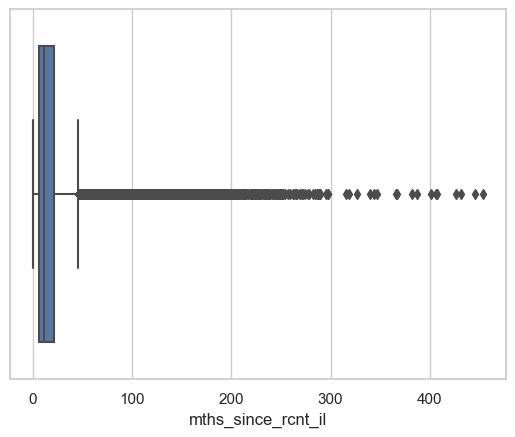

In [41]:
# 设置背景
sns.set(style="whitegrid", color_codes=True)
# 设置横轴为数值
sns.boxplot(x='mths_since_rcnt_il', data=dataset)
# 显示图像
plt.show()

In [42]:
# 查看异常
dataset_copy['mths_since_rcnt_il'][dataset_copy['mths_since_rcnt_il'] > 300]

12549     431.0
17363     382.0
21074     327.0
21592     401.0
32163     445.0
51196     406.0
65111     426.0
69109     316.0
69876     367.0
81846     340.0
82736     344.0
87536     347.0
99514     366.0
107050    387.0
111815    454.0
123497    407.0
129483    319.0
Name: mths_since_rcnt_il, dtype: float64

In [43]:
# 使用 drop()函数 来**删除**这些异常值所存在的行
print("删除异常值之前的行数", len(dataset_copy['mths_since_rcnt_il']))
dataset_copy.drop(list(dataset_copy['mths_since_rcnt_il'][dataset_copy['mths_since_rcnt_il'] > 300].index), axis=0,
                  inplace=True)
print("删除异常值之后的行数", len(dataset_copy['mths_since_rcnt_il']))

删除异常值之前的行数 143035
删除异常值之后的行数 143018


# 重复值处理

In [44]:
dataset_copy.reset_index(inplace=True)
dataset_copy.drop('index', axis=1, inplace=True)
dataset_copy[dataset_copy.duplicated()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag


In [45]:
# 随机选择一行
random_number = np.random.randint(0,len(dataset_copy['loan_amnt']))
print("随机选择的行：",random_number)
print("粘贴前的行数为：",len(dataset_copy['loan_amnt']))
duplicated_row = dataset_copy.iloc[random_number]
dataset_copy.loc[len(dataset_copy['loan_amnt'])] = duplicated_row
print("粘贴后的行数为：",len(dataset_copy['loan_amnt']))
dataset_copy[dataset_copy.duplicated()]

随机选择的行： 49585
粘贴前的行数为： 143018
粘贴后的行数为： 143019


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
143018,157776240,10000,10000,10000,60 months,11.02%,217.53,B,B2,New England Sales Rep,...,90.9,100.0,0,0,200853,37213,9700,43666,N,N


In [46]:
dataset_copy.drop_duplicates(keep='first',inplace=True)
dataset_copy[dataset_copy.duplicated()]
dataset_copy.to_csv("./output/df_drop_duplicated")

# 数据标准化
## Z-Score 标准化

In [47]:
dataset_copy['loan_amnt'].head(10)

0    12000
1    20000
2    18000
3    10000
4     7000
5    24000
6     4000
7    22975
8     4000
9    34025
Name: loan_amnt, dtype: int64

In [48]:
# z-score标准化，适配数据集获取参数
std_scale = preprocessing.StandardScaler().fit(dataset_copy[['loan_amnt']])
# 进行标准化，得到标准化的数据
np_std = std_scale.transform(dataset_copy[['loan_amnt']])
# 将标准化后的数据加到dataset_copy中，替换初始数据
dataset_copy[['loan_amnt']] = np_std
# 查看此列标准化后的数据
dataset_copy['loan_amnt'].head(10)

0   -0.423522
1    0.349594
2    0.156315
3   -0.616800
4   -0.906719
5    0.736152
6   -1.196637
7    0.637097
8   -1.196637
9    1.704963
Name: loan_amnt, dtype: float64

## min-max 标准化

In [49]:
# 查看原数据
dataset_copy['funded_amnt'].head(10)

0    12000
1    20000
2    18000
3    10000
4     7000
5    24000
6     4000
7    22975
8     4000
9    34025
Name: funded_amnt, dtype: int64

In [50]:
# 0-1标准化，适配数据集，确定参数
minmax_scale = preprocessing.MinMaxScaler().fit(dataset_copy[['funded_amnt']])
# 进行标准化，得到标准化的数据
np_minmax = minmax_scale.transform(dataset_copy[['funded_amnt']])
# 将标准化后的数据加到dataset_copy中，替换初始数据
dataset_copy[['funded_amnt']] = np_minmax
# 查看此列标准化后的数据
dataset_copy['funded_amnt'].head(10)

0    0.282051
1    0.487179
2    0.435897
3    0.230769
4    0.153846
5    0.589744
6    0.076923
7    0.563462
8    0.076923
9    0.846795
Name: funded_amnt, dtype: float64

## 自行实验两种方法
小数定标标准化
Logistic 标准化

对`fico_range_low`进行小数定标标准化

In [51]:
dataset_copy['fico_range_low'].head(10)
d=np.ceil(np.log10(np.max(abs(dataset_copy['fico_range_low']))))

In [52]:
dataset_copy['fico_range_low'] /= 10**d
dataset_copy['fico_range_low'].head(10)

0    0.680
1    0.745
2    0.660
3    0.720
4    0.670
5    0.660
6    0.695
7    0.690
8    0.710
9    0.665
Name: fico_range_low, dtype: float64

对 loan_amnt（贷款金额）进行 Logistic 标准化

In [53]:
dataset_copy['loan_amnt'].head(10)

0   -0.423522
1    0.349594
2    0.156315
3   -0.616800
4   -0.906719
5    0.736152
6   -1.196637
7    0.637097
8   -1.196637
9    1.704963
Name: loan_amnt, dtype: float64

In [54]:
# 定义 Logistic 变换函数
def logistic_transform(x):
    return 1 / (1 + np.exp(-x))
# 对 DataFrame 进行原位 Logistic 标准化
dataset_copy['loan_amnt'].apply(logistic_transform)
dataset_copy['loan_amnt'].head(10)

0   -0.423522
1    0.349594
2    0.156315
3   -0.616800
4   -0.906719
5    0.736152
6   -1.196637
7    0.637097
8   -1.196637
9    1.704963
Name: loan_amnt, dtype: float64

# 数据编码
复杂数据简单化
## 数字编码

In [55]:
# 查看原数据
dataset_copy['home_ownership'].head(10)

0        RENT
1        RENT
2        RENT
3        RENT
4        RENT
5    MORTGAGE
6        RENT
7        RENT
8        RENT
9         OWN
Name: home_ownership, dtype: object

In [56]:
# 数字编码
col_dicts = {'home_ownership': {'MORTGAGE': 0,
  'OWN': 1,
  'RENT': 2,
  'others' : 3}}
# 进行转换
dataset_copy['home_ownership'] = dataset_copy['home_ownership'].map(col_dicts['home_ownership'])
# 查看转化后的数据
dataset_copy['home_ownership'].head(10)

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    0.0
6    2.0
7    2.0
8    2.0
9    1.0
Name: home_ownership, dtype: float64

In [57]:
# 保存到磁盘
dataset_copy.to_csv("./output/digit_code.csv")

## One-Hot 编码和哑变量编码

In [58]:
# 查看原始数据
dataset_copy['delinq_2yrs'].head(10)

0    1
1    0
2    0
3    0
4    2
5    3
6    0
7    0
8    0
9    0
Name: delinq_2yrs, dtype: int64

In [59]:
# 独热编码 k 列
targets_onehot = pd.get_dummies(dataset_copy['delinq_2yrs'], prefix='delinq')
targets_onehot

,delinq_0,delinq_1,delinq_2,delinq_3,delinq_4,delinq_5,delinq_6,delinq_7,delinq_8,delinq_9,...,delinq_12,delinq_13,delinq_14,delinq_15,delinq_16,delinq_17,delinq_19,delinq_21,delinq_22,delinq_26
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143013,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143014,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143015,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143016,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# 哑变量 k-1 列
targets_dummy = pd.get_dummies(dataset_copy['delinq_2yrs'], prefix='delinq',drop_first =True)
targets_dummy

,delinq_1,delinq_2,delinq_3,delinq_4,delinq_5,delinq_6,delinq_7,delinq_8,delinq_9,delinq_10,...,delinq_12,delinq_13,delinq_14,delinq_15,delinq_16,delinq_17,delinq_19,delinq_21,delinq_22,delinq_26
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 数据保存
使用原生方法或者 pandas 方法

In [61]:
columns = list(dataset_copy.columns)
with open("./output/finish.csv","w") as fw:
    columns_write = ""
        ## 写入列名
    for column in columns:
        columns_write = columns_write+","+column
    columns_write = columns_write[1:]
    print(columns_write)
    fw.write(columns_write+"\n")
    ## 写入内容
    for i in range(0,len(dataset_copy['loan_amnt'])):
        str_write = ""
        for column in columns:
            str_write = str_write+","+str(dataset_copy[column][i])
        str_write = str_write[1:]
        ## 输出查看
        if i<3:
            print(str_write)
        fw.write(str_write+"\n")

id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_

In [62]:
dataset_copy.to_csv("./output/finish2.csv",index = False)